In [1]:
import matplotlib.pyplot as plt
import numpy as np
from api.smithwilson import SmithWilson
from api.riskfreerates import RiskFreeRates

In [2]:
sek_swap_20230531 = np.array([0.0363, 0.033716, 0.030886, 0.02917])

In [3]:
CRA = 0.001
maturities = np.array([2, 3, 5, 10])
projection = np.arange(1, 151)
ufr = 0.0345
convergence_maturity = 20
tol = 1e-4

In [4]:
sw_adjusted = sek_swap_20230531 - CRA

In [5]:
SW = SmithWilson(ufr, convergence_maturity, tol, alpha0=None)

In [6]:
alpha, price = SW.project(sw_adjusted, maturities, projection)

In [7]:
r = np.power(1 / price, 1 / projection) - 1

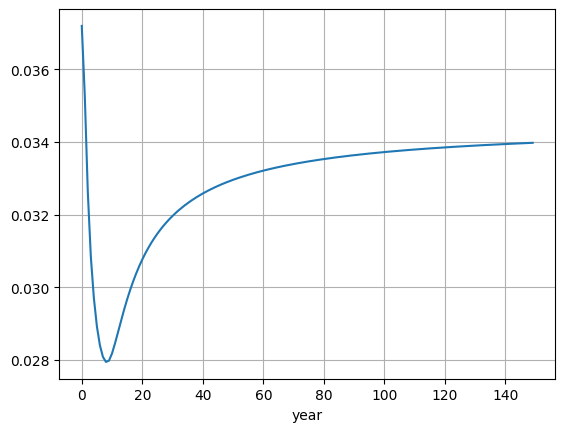

In [8]:
plt.plot(r)
plt.grid(True)
plt.xlabel('year')
plt.show()

In [9]:
eiopa = np.genfromtxt('../Data/SE_31_5_2023_SWP_LLP_10_EXT_10_UFR_345.csv')

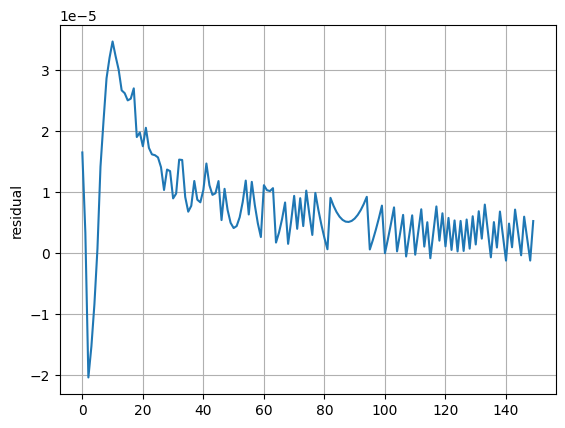

In [10]:
plt.plot(eiopa-r)
plt.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
plt.grid(True)
plt.ylabel('residual')
plt.show()

In [11]:
mse = (np.square(eiopa - r)).mean()

In [12]:
print(f'MSE: {mse}, alpha: {alpha}')

MSE: 1.2470797051797787e-10, alpha: 0.3919787961295073


With alpha from EIOPA

In [13]:
alpha0 = 0.391017

In [14]:
SW_alpha = SmithWilson(ufr, convergence_maturity, tol, alpha0)

In [15]:
alpha2, price2 = SW_alpha.project(sw_adjusted, maturities, projection)

In [16]:
r2 = np.power(1 / price2, 1 / projection) - 1

In [17]:
mse2 = (np.square(eiopa - r2)).mean()

In [18]:
print(f'MSE: {mse2}, alpha: {alpha2}')

MSE: 1.3948885088805536e-10, alpha: 0.391017


Monthly projection using RiskFreeRates

In [19]:
RFR = RiskFreeRates(sek_swap_20230531, maturities, projection, ufr, convergence_maturity, tol, CRA, None)

In [20]:
alpha_monthly, price_monthly, r_monthly = RFR.monthly()

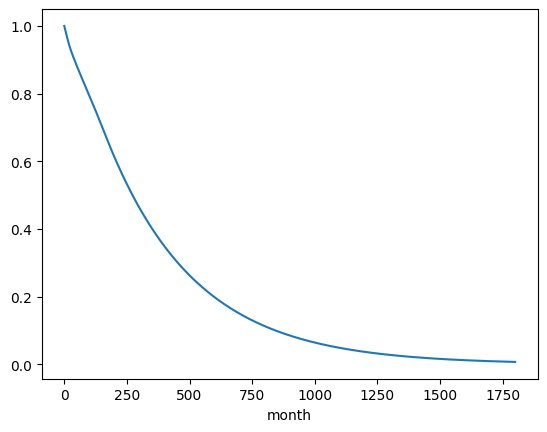

In [21]:
plt.plot(price_monthly)
plt.xlabel('month')
plt.show()

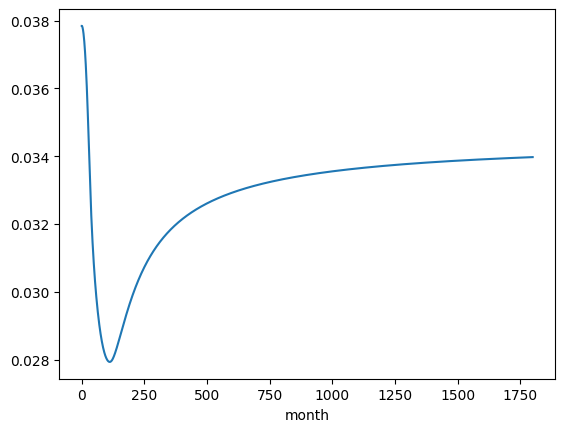

In [22]:
plt.plot(r_monthly)
plt.xlabel('month')
plt.show()

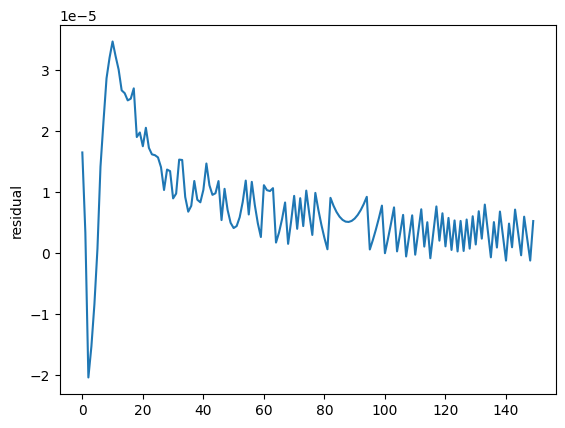

In [23]:
plt.plot(eiopa-r_monthly[12::12])
plt.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
plt.ylabel('residual')
plt.show()

In [24]:
mse3 = (np.square(eiopa - r_monthly[12::12])).mean()

In [26]:
print(f'MSE: {mse3}, alpha: {alpha_monthly}')

MSE: 1.2470797051813832e-10, alpha: 0.3919787961295073
